In [134]:
import numpy as np
import matplotlib.pyplot as plt
import copy
%matplotlib inline


In [135]:
#funkcije
def target(x):
    return 5*x

def Sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

def Error(h,Y):
    return (h-Y)**2

#Error = np.vectorize(Error)

def dError(E):
    return 2 * (E)

def setUpW(L):
    W = []
    n = len(L)-1
    for i in range (0,n):
        W.append(0.2 * np.random.randn(L[i+1],L[i]))
        #W[i] -= np.mean(W[i])
    return W
def setUpB(L):
    B = []
    n = len(L)-1
    for i in range (0,n):
        B.append(0.2 * np.random.randn(L[i+1],1))
        #B[i] -= np.mean(B[i]) 
    return B

def forward(X,Y,W,B,L):
    H = []
    A = []
    n = len(L)-1
    for i in range(0,n):
        if i == 0:
            A.append(copy.deepcopy(X))
            H.append(copy.deepcopy(X))
            a = W[i].dot(X)+ B[i]
            A.append(a)
            h = Sigmoid(a)
            H.append(h)
        elif i == n-1:
            a = np.dot(W[i],h) + B[i]
            A.append(a)
            h = a
            H.append(h)            
        else:
            a = W[i].dot(h) + B[i]
            A.append(a)
            h = Sigmoid(a)
            H.append(h)
    return (A,H)

def backward(A,H,E,W,B,L,reg_param):
    
    d = dError(E)
    k = len(L)-1
    n = len(L)-1
    dB = []
    dW = []
    while k>0:
        #print (k)
        if k == len(L) -1:
            d = d * np.ones(H[k].shape)
        else:
            d= d * ( 1 - H[k]) * (H[k])
            
        
        dB.insert(0,d + reg_param * 2 * H[len(L)-1] ) #  reg_param * 2 * H[len(L)-1] je izvod regularizacije
        dW.insert(0,d*((H[k-1].T)) + reg_param * 2 * H[len(L)-1] )
   
        d = W[k-1].T.dot(d)
        k = k-1
    return (dW,dB)

def iteracija(X,Y,W,B,L,ni,reg_param):
    (A,H) = forward(X,Y,W,B,L)
    h = H[len(L)-1]
    E = Error(h,Y)
    C = E + reg_param * h**2
    (dW,dB) = backward(A,H,E,W,B,L,reg_param)
    #print (dW)
    Wr = []
    Br = []
    k = len(W)
    for i in range(0, k):
        Wr.append( W[i] - ni * dW[i])
        Br.append( B[i] - ni * dB[i])
    return (A,H,E,Wr,Br,C)

In [136]:
#inicijalizacija
L = [2,4,2,1]

W = setUpW(L)
B = setUpB(L)
ni = 0.1
reg_param = 0.1
len(L)

4

In [137]:
#init trening podataka
input_size = 100
#X = np.empty([input_size,L[0],1])
Y = np.empty([input_size])
X = 0.2*np.random.randn(input_size,L[0],1)
X[:] -= np.mean(X[:],axis=0)
Y = 2*X[:,0,0]


In [138]:
#treniranje
niz = np.empty([input_size])
for i in (0,input_size-1):
    (A,H,E,W,B,C) = iteracija(X[i],Y[i],W,B,L,ni,reg_param)
    niz[i] = E
niz

array([ 0.14799018,  0.91220673, -0.68336467, -0.8148323 ,  0.15044917,
       -0.35752948,  1.20055035,  0.24117928, -0.51834727, -0.03653827,
        0.16436431, -1.24862832, -0.93398777,  0.99580783,  0.64164967,
        0.46990242, -0.33975512,  2.03292974, -0.66885268, -0.92081272,
        1.16872193, -0.13398202,  0.69378906, -1.27395232,  0.55330839,
        1.52188001,  0.25705551,  0.24774967, -1.52891128, -0.13840288,
        0.83379813,  1.04314763,  0.10123041,  0.13394924, -1.95740557,
        1.06329194,  0.48425075,  0.1380138 , -0.98834575, -1.07723828,
       -2.33258508,  0.20317339, -1.59316492,  0.10733063, -1.97579518,
       -1.49701104, -0.01885532, -0.15639601, -0.99158474, -2.0260604 ,
        0.17772974,  0.21220676, -0.07380249,  0.08871125,  0.42869731,
        1.00195823,  1.44090324,  0.60578792, -0.11856124, -1.18458503,
       -0.4833003 ,  0.30217049,  2.3841073 , -0.18007838, -0.88153812,
        1.26446858, -0.50843505, -0.82932472,  1.00912299, -1.60

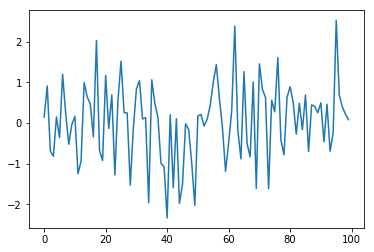

In [139]:
plt.plot(np.arange(input_size),(niz))
#plt.ylim([-0.1,1000])

In [140]:
(A,H) = forward(np.array([[-0.7],[0.85]]),Y,W,B,L)

In [141]:
H

[array([[-0.7 ],
        [ 0.85]]), array([[ 0.45788367],
        [ 0.44833381],
        [ 0.55676901],
        [ 0.52140692]]), array([[ 0.52388055],
        [ 0.44125889]]), array([[ 0.40151961]])]

In [152]:
test_size = 50

Yt = np.empty([test_size])
Xt = 0.2*np.random.randn(test_size,L[0],1)+1
Xt -= np.mean(Xt,axis=0)
Yt = 2*Xt[:,0,0]


In [153]:
nizT = np.empty([test_size])
for i in (0,test_size-1):
    (A,H) = forward(Xt[i],Yt[i],W,B,L)
    nizT[i] =np.sum( H[len(L)-1])
nizT

array([  4.01672372e-001,   4.94065646e-324,   9.88131292e-324,
         1.48219694e-323,   1.97626258e-323,   2.47032823e-323,
         2.96439388e-323,   3.45845952e-323,   3.95252517e-323,
         4.44659081e-323,   4.94065646e-323,   5.43472210e-323,
         5.92878775e-323,   6.42285340e-323,   6.91691904e-323,
         7.41098469e-323,   7.90505033e-323,   8.39911598e-323,
         8.89318163e-323,   9.38724727e-323,   9.88131292e-323,
         1.03753786e-322,   1.08694442e-322,   1.13635099e-322,
         1.18575755e-322,   1.23516411e-322,   1.28457068e-322,
         1.33397724e-322,   1.38338381e-322,   1.43279037e-322,
         1.48219694e-322,   1.53160350e-322,   1.58101007e-322,
         1.63041663e-322,   1.67982320e-322,   1.72922976e-322,
         1.77863633e-322,   1.82804289e-322,   1.87744945e-322,
         1.92685602e-322,   1.97626258e-322,   2.02566915e-322,
         2.07507571e-322,   2.12448228e-322,   2.17388884e-322,
         2.22329541e-322,   2.27270197e-

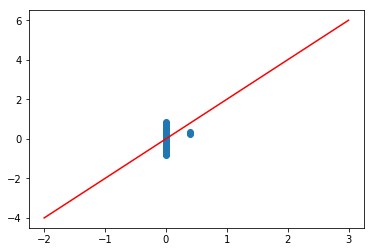

In [154]:
plt.scatter(nizT,Yt)
plt.plot(np.arange(-2,4), 2* np.arange(-2,4),color ="r")
#plt.xlim([-1,5])

In [155]:
i =0
W[2].dot(Sigmoid(W[1].dot(Sigmoid(W[0].dot(Xt[i]) + B[0])) + B[1])) + B[2]

array([[ 0.40167237]])